In [9]:
# Getting Data
from sys import path
path.append('../..')
from getTrainingData import getTrainingData

# Get data using the improved function
data = getTrainingData(test_size=0.2, random_state=42, scale_features=True)
data

{'X_train':      category_accessories  category_baby  category_dresses  category_jackets  \
 137             -0.163398      -0.170872         -0.204626         -0.378475   
 36              -0.163398      -0.170872         -0.204626         -0.378475   
 89              -0.163398      -0.170872         -0.204626         -0.378475   
 373             -0.163398      -0.170872         -0.204626          2.642183   
 467             -0.163398      -0.170872         -0.204626         -0.378475   
 ..                    ...            ...               ...               ...   
 76              -0.163398      -0.170872         -0.204626         -0.378475   
 111             -0.163398      -0.170872         -0.204626         -0.378475   
 353             -0.163398      -0.170872         -0.204626         -0.378475   
 435             -0.163398      -0.170872         -0.204626         -0.378475   
 107             -0.163398      -0.170872         -0.204626         -0.378475   
 
      category_

# Polynominal Regression

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Get training and testing data from dictionary
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Display first few feature names
print(f"Example features: {data['feature_names'][:5]}")

Training data shape: (338, 136)
Testing data shape: (85, 136)
Example features: ['category_accessories', 'category_baby', 'category_dresses', 'category_jackets', 'category_jeans']


## Creating and training the Model

In [11]:
from sklearn.decomposition import PCA

# Reduce features to 1D using Principal Component Analysis
# Using 2 components to capture more variance
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print explained variance ratio to see how much information is retained
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2f}")

# Use the first principal component for the polynomial fit
condensedXTrain = X_train_pca[:, 0]
condensedXTest = X_test_pca[:, 0]

# Try a lower degree polynomial (degree 3 is often good for non-linear patterns)
poly_degree = 3
preg = np.poly1d(np.polyfit(condensedXTrain, y_train, poly_degree))

# Make predictions for plotting in the next cell
y_predictions = preg(condensedXTest)
y_predictions

Explained variance ratio: [0.04300266 0.03788193]
Total variance explained: 0.08


array([21.14357609, 19.20358326, 17.77398346, 33.31205632, 34.25535655,
       24.3464604 , 21.6947985 , 21.6947985 , 34.38508299, 24.65353964,
       23.26361475, 25.9915582 , 28.7023563 , 28.14719971, 29.81591493,
       33.31205632, 21.82064428, 21.42817067, 21.78320047, 22.24018454,
       29.50026512, 23.41688705, 37.24530631, 20.82670092, 33.81687713,
       50.90211383, 32.53711182, 48.11097433, 22.81180027, 28.9679176 ,
       26.61912014, 21.41130604, 22.00865327, 33.81687713, 29.23540722,
       21.79130279, 21.71563103, 31.71817737, 21.64999876, 54.21114079,
       28.34340793, 24.65353964, 33.31205632, 25.17078681, 24.66094137,
       24.49449656, 21.6947985 , 18.25632591, 23.35134353, 23.25461762,
       23.32873819, 21.40810175, 22.16206269, 34.15670325, 19.20358326,
       24.99986787, 20.96861038, 19.65956895, 28.43014268, 24.65353964,
       33.27864364, 24.59265355, 29.78042005, 24.21028483, 20.23140925,
       23.22409835, 32.4027816 , 32.64830574, 18.47676282, 19.94

## Model Evaluation

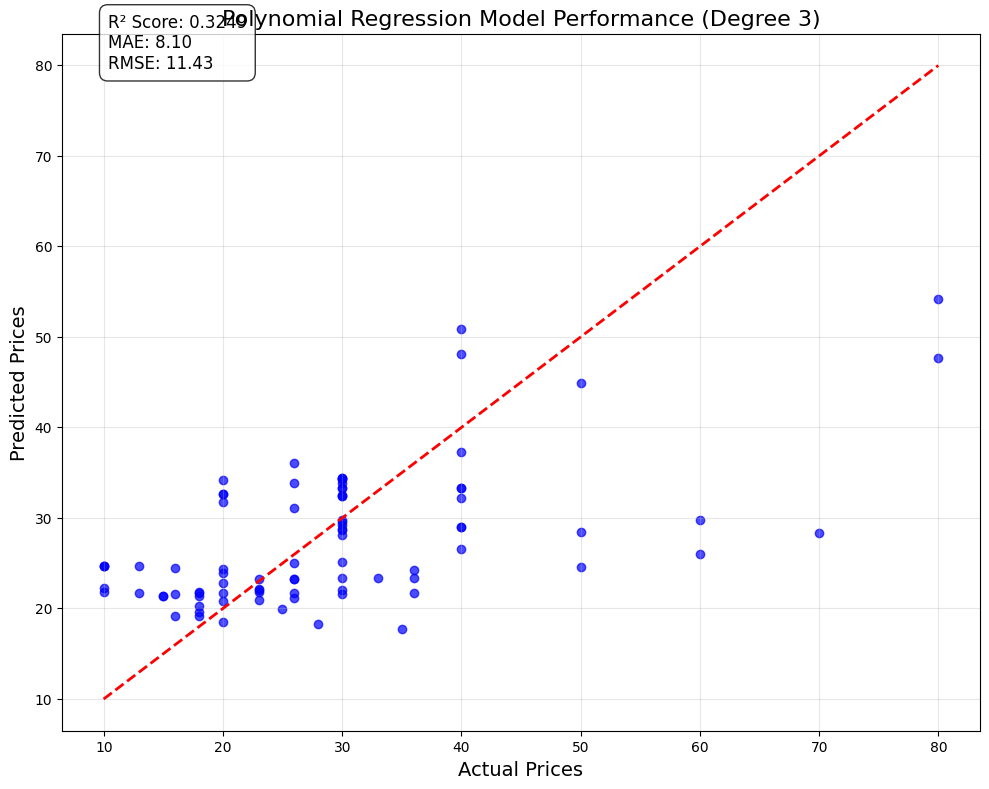

R² Score: 0.3249
Mean Absolute Error: 8.10
Root Mean Squared Error: 11.43


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

plt.figure(figsize=(10, 8))

# Create a clear scatter plot of actual vs predicted values
plt.scatter(y_test, y_predictions, color='blue', alpha=0.7)
# Add the perfect prediction line
min_val = min(y_test.min(), y_predictions.min())
max_val = max(y_test.max(), y_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

plt.xlabel('Actual Prices', fontsize=14)
plt.ylabel('Predicted Prices', fontsize=14)
plt.title(f'Polynomial Regression Model Performance (Degree {poly_degree})', fontsize=16)

# Add annotation with model metrics
r2 = r2_score(y_test, y_predictions)
mae = mean_absolute_error(y_test, y_predictions)
rmse = np.sqrt(mean_squared_error(y_test, y_predictions))

plt.annotate(f"R² Score: {r2:.4f}\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}", 
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8),
             fontsize=12)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

# Conclusion
Polynominal Regression is performing even worse for our application